# Analisis Kepadatan Penumpang KRL Rute Rangkasbitung - Tanah Abang dengan Pendekatan Exploratory Data Analysis

### Collecting Data

#### Import Library

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['agg.path.chunksize'] = 10000
%matplotlib inline

print(f'Matplotlib: {matplotlib.__version__}')
print(f'pandas: {pd.__version__}')
print(f'numpy: {np.__version__}')

Matplotlib: 3.2.2
pandas: 1.0.5
numpy: 1.18.5


#### Mengubah CSV files menjadi DataFrame

In [2]:
# load file CSV
covid = pd.read_csv('./dataset/baru/tap_in.csv') # memuat file csv sebagai data frame
covid.head() # tampilkan 5 baris pertama

,c_station,t_minute,Kereta,1/13/2020,1/14/2020,1/15/2020,1/16/2020,1/17/2020,1/18/2020,1/19/2020,Rata-rata
0,RK,12:00:00 AM,1923.0,0,0,0,0,0,0,0,0
1,RK,12:01:00 AM,1923.0,0,0,0,0,0,0,0,0
2,RK,12:02:00 AM,1923.0,0,0,0,0,0,0,0,0
3,RK,12:03:00 AM,1923.0,0,0,0,0,0,0,0,0
4,RK,12:04:00 AM,1923.0,0,0,0,0,0,0,0,0


## Preprocessing Dataset

#### Explore Dataset

In [3]:
# melihat dimensi dataset
covid.shape

(27570, 11)

In [4]:
# melihat tipe data setiap kolom
covid.dtypes

c_station     object
t_minute      object
Kereta       float64
1/13/2020     object
1/14/2020     object
1/15/2020     object
1/16/2020     object
1/17/2020     object
1/18/2020     object
1/19/2020     object
Rata-rata     object
dtype: object

In [5]:
# menampilkan isi seluruh dataset
covid

,c_station,t_minute,Kereta,1/13/2020,1/14/2020,1/15/2020,1/16/2020,1/17/2020,1/18/2020,1/19/2020,Rata-rata
0,RK,12:00:00 AM,1923.0,0,0,0,0,0,0,0,0
1,RK,12:01:00 AM,1923.0,0,0,0,0,0,0,0,0
2,RK,12:02:00 AM,1923.0,0,0,0,0,0,0,0,0
3,RK,12:03:00 AM,1923.0,0,0,0,0,0,0,0,0
4,RK,12:04:00 AM,1923.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
27565,THB,11:55:00 PM,NaN,0,NaN,NaN,0,NaN,0,0,0
27566,THB,11:56:00 PM,NaN,0,NaN,NaN,0,NaN,0,0,0
27567,THB,11:57:00 PM,NaN,0,NaN,NaN,0,NaN,0,0,0
27568,THB,11:58:00 PM,NaN,0,NaN,NaN,0,NaN,0,0,0


#### Drop Missing Values

In [6]:
# mendeteksi keberadaan missing values
covid.isna().values.any()

True

In [7]:
covid[covid.isna()] #menampilkan data missing values

,c_station,t_minute,Kereta,1/13/2020,1/14/2020,1/15/2020,1/16/2020,1/17/2020,1/18/2020,1/19/2020,Rata-rata
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
27565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# drop semua baris dengan missing values
covid.dropna(inplace=True)

#### Change Data Types

In [9]:
#mengubah tipe data kolom tanggal menjadi numeric
cols = ['1/13/2020', '1/14/2020', '1/15/2020', '1/16/2020', '1/17/2020', '1/18/2020', '1/19/2020', 'Rata-rata']
covid[cols] = covid[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [10]:
# mengubah tipe data kolom Tanggal, dan Rata-rata menjadi integer
covid[cols] = covid[cols].astype(np.int64)

In [11]:
# mengubah tipe data kolom Kereta menjadi object
covid['Kereta'] = covid['Kereta'].astype(object)

In [12]:
# tampilkan dataframe covid
covid

,c_station,t_minute,Kereta,1/13/2020,1/14/2020,1/15/2020,1/16/2020,1/17/2020,1/18/2020,1/19/2020,Rata-rata
0,RK,12:00:00 AM,1923,0,0,0,0,0,0,0,0
1,RK,12:01:00 AM,1923,0,0,0,0,0,0,0,0
2,RK,12:02:00 AM,1923,0,0,0,0,0,0,0,0
3,RK,12:03:00 AM,1923,0,0,0,0,0,0,0,0
4,RK,12:04:00 AM,1923,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
25800,PLM,9:43:00 PM,2107,0,0,0,0,0,0,0,0
25801,PLM,9:44:00 PM,2107,0,0,0,0,0,0,0,0
25802,PLM,9:45:00 PM,2107,0,0,0,0,0,0,0,0
25803,PLM,9:46:00 PM,2107,0,0,0,0,0,0,0,0


#### Change Column Name

In [13]:
# mengubah nama kolom Kereta menjadi train
krl = covid.rename(columns={'Kereta': 'train'})

In [14]:
# melihat dimensi dataset
krl.shape

(10396, 11)

In [15]:
# melihat tipe data setiap kolom
krl.dtypes

c_station    object
t_minute     object
train        object
1/13/2020     int64
1/14/2020     int64
1/15/2020     int64
1/16/2020     int64
1/17/2020     int64
1/18/2020     int64
1/19/2020     int64
Rata-rata     int64
dtype: object

In [16]:
# menampilkan isi seluruh dataset
krl

,c_station,t_minute,train,1/13/2020,1/14/2020,1/15/2020,1/16/2020,1/17/2020,1/18/2020,1/19/2020,Rata-rata
0,RK,12:00:00 AM,1923,0,0,0,0,0,0,0,0
1,RK,12:01:00 AM,1923,0,0,0,0,0,0,0,0
2,RK,12:02:00 AM,1923,0,0,0,0,0,0,0,0
3,RK,12:03:00 AM,1923,0,0,0,0,0,0,0,0
4,RK,12:04:00 AM,1923,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
25800,PLM,9:43:00 PM,2107,0,0,0,0,0,0,0,0
25801,PLM,9:44:00 PM,2107,0,0,0,0,0,0,0,0
25802,PLM,9:45:00 PM,2107,0,0,0,0,0,0,0,0
25803,PLM,9:46:00 PM,2107,0,0,0,0,0,0,0,0


## Processing Dataset : Analyze Data

#### 1. Menampilkan grafik total ```Jumlah Penumpang``` dari setiap ```Kereta``` pada setiap ```Stasiun```

In [17]:
# menampilkan total jumlah penumpang dari setiap kereta dan stasiun perhentian dari tanggal 13-19 Januari 2020
# hasil seleksi disimpan pada dataframe baru dalam variabel penumpang
penumpang = krl.groupby(['train', 'c_station']).agg({'Rata-rata': np.sum})
penumpang = penumpang.reset_index()
print(penumpang)

      train c_station  Rata-rata
0    1923.0     CCY          100
1    1923.0     CJT          109
2    1923.0     CKY           56
3    1923.0     CSK           97
4    1923.0     CTR           22
..      ...       ...        ...
553  2107.0     RU            32
554  2107.0     SDM           14
555  2107.0     SRP            7
556  2107.0     TEJ           10
557  2107.0     TIG           23

[558 rows x 3 columns]


In [18]:
# mengubah tipe data train menjadi object karena setelah seleksi sebelumnya berubah menjadi float
penumpang['train'] = penumpang['train'].astype(object)

In [19]:
# menampilkan kembali dataframe baru bernama penumpang
penumpang

,train,c_station,Rata-rata
0,1923,CCY,100
1,1923,CJT,109
2,1923,CKY,56
3,1923,CSK,97
4,1923,CTR,22
...,...,...,...
553,2107,RU,32
554,2107,SDM,14
555,2107,SRP,7
556,2107,TEJ,10


In [20]:
# menampilkan dataset train_per_station
penumpang.sort_values(by='Rata-rata', ascending=False)

,train,c_station,Rata-rata
50,1937,SDM,496
83,1949,PRP,480
86,1949,SDM,385
104,1955,SDM,375
68,1943,SDM,358
...,...,...,...
478,2081,PLM,0
488,2087,CKY,0
496,2087,PLM,0
28,1931,PLM,0


Visualisasi Kondisi Jumlah Penumpang ditiap Kereta pada Tiap Stasiun (1)

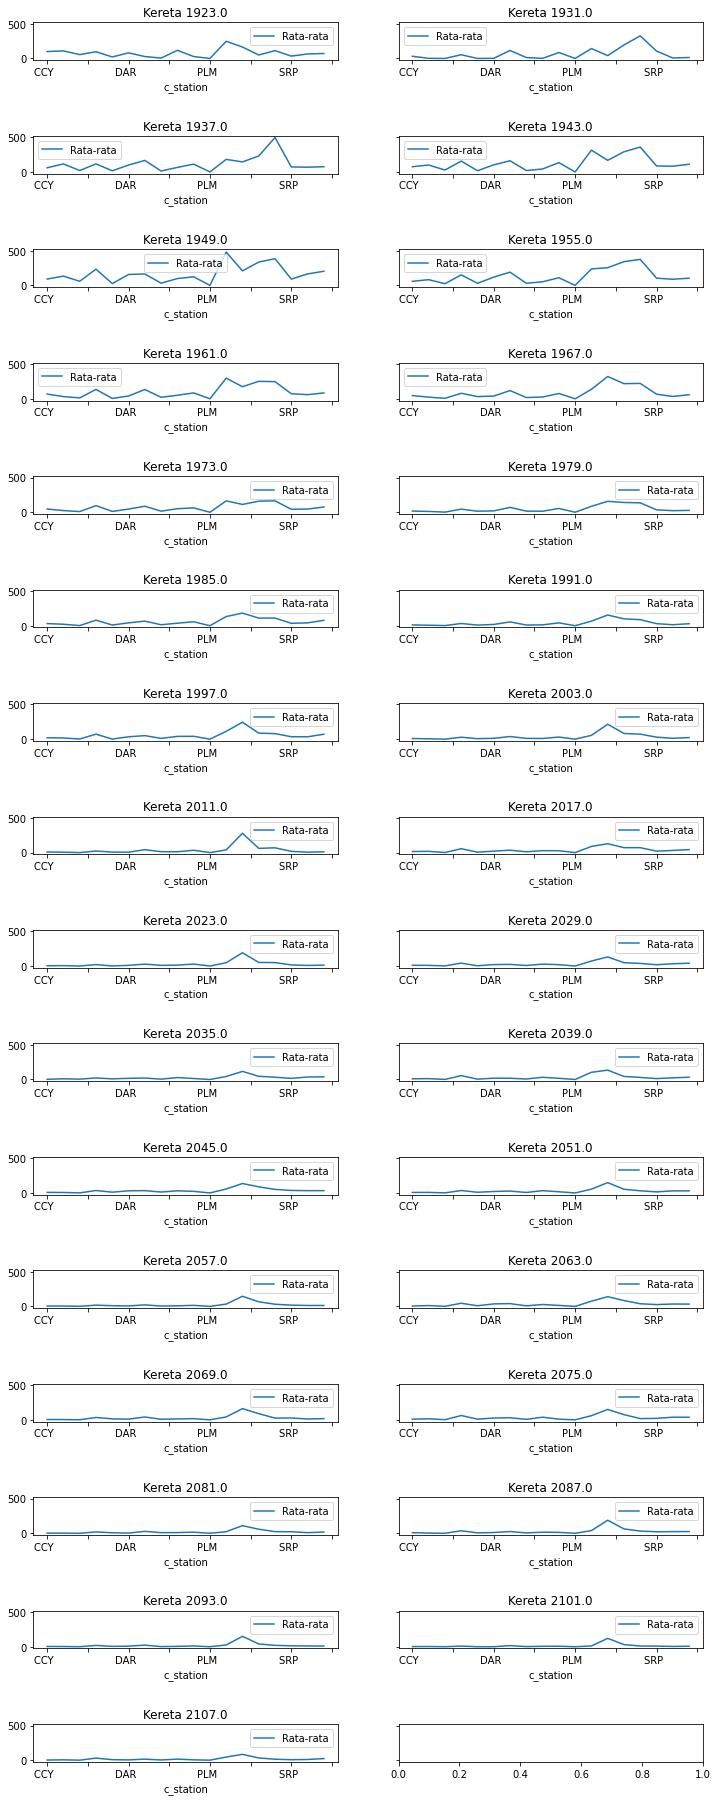

In [22]:
grouped = penumpang.groupby('train')

ncols=2
nrows = int(np.ceil(grouped.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,32), sharey=True)
#plt.tight_layout()
fig.subplots_adjust(hspace=2)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    grouped.get_group(key).plot(x='c_station', y='Rata-rata', ax=ax)
    ax.set_title("Kereta {}".format(key))
    #ax.xaxis.set_tick_params(labelbottom=True)
    #ax.yaxis.set_tick_params(labelleft=True)
    #ax.set_xticks(np.arange(len(x)))
    
ax.legend(loc = 'best')
plt.savefig('./dataset/baru/test.png')
plt.show()

Visualisasi Kondisi Jumlah Penumpang ditiap Kereta pada tiap Stasiun (2)

In [23]:
# membuat kolom c_station sebagai index dan menyimpan perubahan ini dalam variabel train_per_station
train_per_station = penumpang.set_index('c_station')

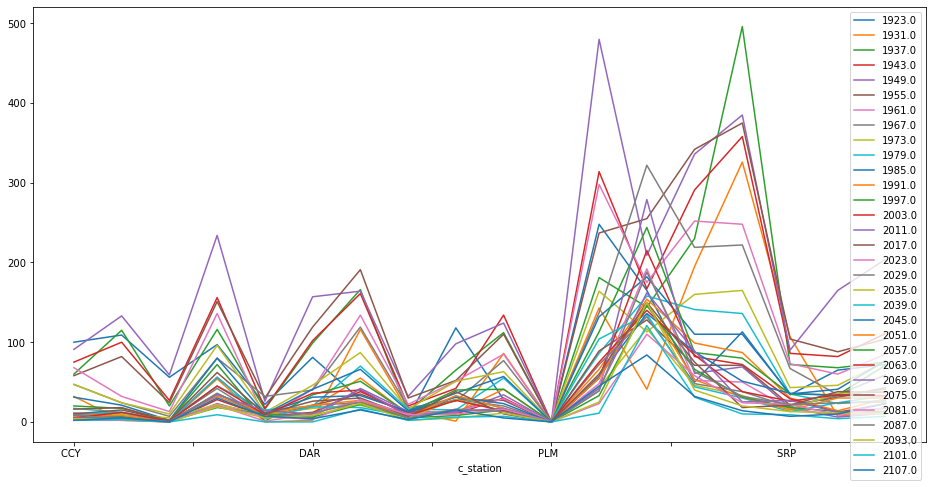

In [24]:
# menampilkan grafik total jumlah penumpang dari setiap kereta pada setiap stasiun
grouped = train_per_station.groupby(['train'])
fig, ax = plt.subplots(figsize=(16,8))
for key, group in grouped:
    group['Rata-rata'].plot(label=key, ax=ax)

plt.legend(loc='best')
plt.savefig('./dataset/baru/test2.png')
plt.show()

#### 2. Menampilkan grafik total ```Jumlah Penumpang``` dari setiap ```Kereta```

In [25]:
# menampilkan jumlah penumpang total dari setiap kereta dari tanggal 13-19 Januari 2020
# hasil seleksi disimpan pada dataframe baru dalam variabel penumpang
kereta = krl.groupby('train').agg({'Rata-rata': np.sum})
kereta = kereta.reset_index()
print(kereta)

     train  Rata-rata
0   1923.0       1391
1   1931.0       1139
2   1937.0       2048
3   1943.0       2243
4   1949.0       2987
5   1955.0       2352
6   1961.0       1778
7   1967.0       1530
8   1973.0       1219
9   1979.0        873
10  1985.0       1045
11  1991.0        676
12  1997.0        953
13  2003.0        638
14  2011.0        635
15  2017.0        674
16  2023.0        502
17  2029.0        553
18  2035.0        463
19  2039.0        560
20  2045.0        627
21  2051.0        529
22  2057.0        415
23  2063.0        627
24  2069.0        521
25  2075.0        609
26  2081.0        361
27  2087.0        517
28  2093.0        349
29  2101.0        238
30  2107.0        301


In [26]:
# mengubah tipe data train menjadi object karena setelah seleksi sebelumnya berubah menjadi float
kereta['train'] = kereta['train'].astype(object)

Gabungkan data ```jadwal_kereta.csv``` dengan dataframe ```kereta```

In [27]:
# jadwal_kereta.csv berisi kolom train (primary key), departure, dan interval.
jdw = pd.read_csv('./dataset/baru/jadwal_kereta.csv') # memuat file csv sebagai data frame
jdw.head() # tampilkan 5 baris pertama

,train,departure,interval
0,1923,4:00:00,0:00:00
1,1931,4:30:00,0:30:00
2,1937,5:00:00,0:30:00
3,1943,5:30:00,0:30:00
4,1949,6:00:00,0:30:00


In [28]:
# mengubah tipe data train menjadi object
jdw['train'] = jdw['train'].astype(object)

In [29]:
# tampilkan data jdw
jdw

,train,departure,interval
0,1923,4:00:00,0:00:00
1,1931,4:30:00,0:30:00
2,1937,5:00:00,0:30:00
3,1943,5:30:00,0:30:00
4,1949,6:00:00,0:30:00
5,1955,6:30:00,0:30:00
6,1961,7:00:00,0:30:00
7,1967,7:30:00,0:30:00
8,1973,8:00:00,0:30:00
9,1979,8:30:00,0:30:00


In [30]:
# gabungkan dataframe jdw dengan kereta
gabungs = pd.merge(kereta, jdw, on="train")

In [31]:
# tampilkan dataset gabungs : hasil dari penggabungan dataframe jdw dengan kereta
gabungs

,train,Rata-rata,departure,interval
0,1923,1391,4:00:00,0:00:00
1,1931,1139,4:30:00,0:30:00
2,1937,2048,5:00:00,0:30:00
3,1943,2243,5:30:00,0:30:00
4,1949,2987,6:00:00,0:30:00
5,1955,2352,6:30:00,0:30:00
6,1961,1778,7:00:00,0:30:00
7,1967,1530,7:30:00,0:30:00
8,1973,1219,8:00:00,0:30:00
9,1979,873,8:30:00,0:30:00


In [32]:
gabungs.dtypes

train        object
Rata-rata     int64
departure    object
interval     object
dtype: object

Visualisasi ```gabungs```

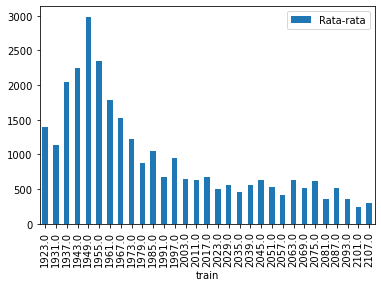

In [34]:
#tampilkan grafik jenis kereta dengan jumlah rata-rata penumpang setiap hari yang diangkut
gabungs.plot(kind='bar', x='train', y='Rata-rata')

#### 3. Mencari Korelasi

In [35]:
# mengubah record dari kolom departure ke dalam tipe kategori
gabungs['departure']=gabungs['departure'].astype('category').cat.codes

In [36]:
# menampilkan perubahan format departure pada dataframe gabungs
# setiap isi record diberi kategori unik dari 1 sampai 30 dalam tipe integer
gabungs

,train,Rata-rata,departure,interval
0,1923,1391,19,0:00:00
1,1931,1139,20,0:30:00
2,1937,2048,21,0:30:00
3,1943,2243,22,0:30:00
4,1949,2987,23,0:30:00
5,1955,2352,24,0:30:00
6,1961,1778,25,0:30:00
7,1967,1530,26,0:30:00
8,1973,1219,27,0:30:00
9,1979,873,28,0:30:00


In [37]:
# tunjukkan korelasi antara Jadwal Keberangkatan (departure) dengan Jumlah Penumpang (Rata-rata)
gabungs.corr()

,Rata-rata,departure
Rata-rata,1.00000,0.51562
departure,0.51562,1.00000


Visualisasi Korelasi

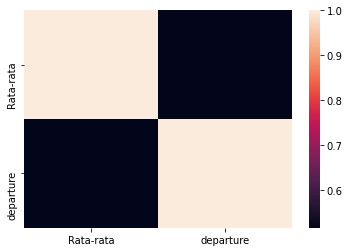

In [38]:
sns.heatmap(data=gabungs.corr())

In [ ]:
for i, group in train_per_station.groupby("train"):
    plt.figure()
    y=group['Rata-rata']
    x=group['c_station']
    plt.scatter(x,y)

    plt.plot(range(4))
    plt.xlim(-.5, 3.5)
    plt.ylim(-.5, 3.5)
    plt.xlabel('Nama Stasiun')
    plt.ylabel('Rata-rata Jumlah Penumpang Harian')

    plt.gca().set_aspect('equal', adjustable='box')

    plt.title(i) #Label each plot

    plt.show()